In [ ]:
!pip install qiskit[visualization]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


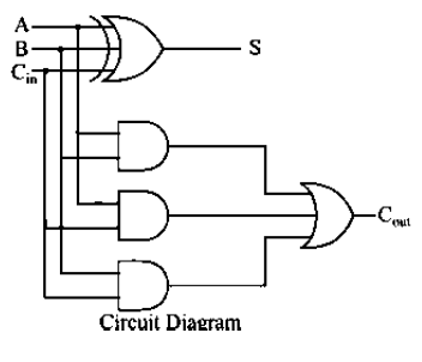

# "Not" Gate

In [ ]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

def NOT(inp):
    """An NOT gate.
    
    Parameters:
        inp (str): Input, encoded in qubit 0.
        
    Returns:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0)
    qc.initialize(inp)
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
        
    # barrier between input state and gate operation 
    qc.barrier()
    
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x(0)
    
    #barrier between gate operation and measurement
    qc.barrier()
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure(0,0)
    qc.draw('mpl')
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output


In [ ]:
for inp in ['0', '1']:
    qc, out = NOT(inp)
    print('NOT with input',inp,'gives output',out)
    display(qc.draw())
    print('\n')

NOT with input 0 gives output 1


┌───────────────┐ ░ ┌───┐ ░ ┌─┐
  q: ─|0>─┤ Initialize(0) ├─░─┤ X ├─░─┤M├
          └───────────────┘ ░ └───┘ ░ └╥┘
c: 1/══════════════════════════════════╩═
                                       0



NOT with input 1 gives output 0


┌───────────────┐ ░ ┌───┐ ░ ┌─┐
  q: ─|0>─┤ Initialize(1) ├─░─┤ X ├─░─┤M├
          └───────────────┘ ░ └───┘ ░ └╥┘
c: 1/══════════════════════════════════╩═
                                       0

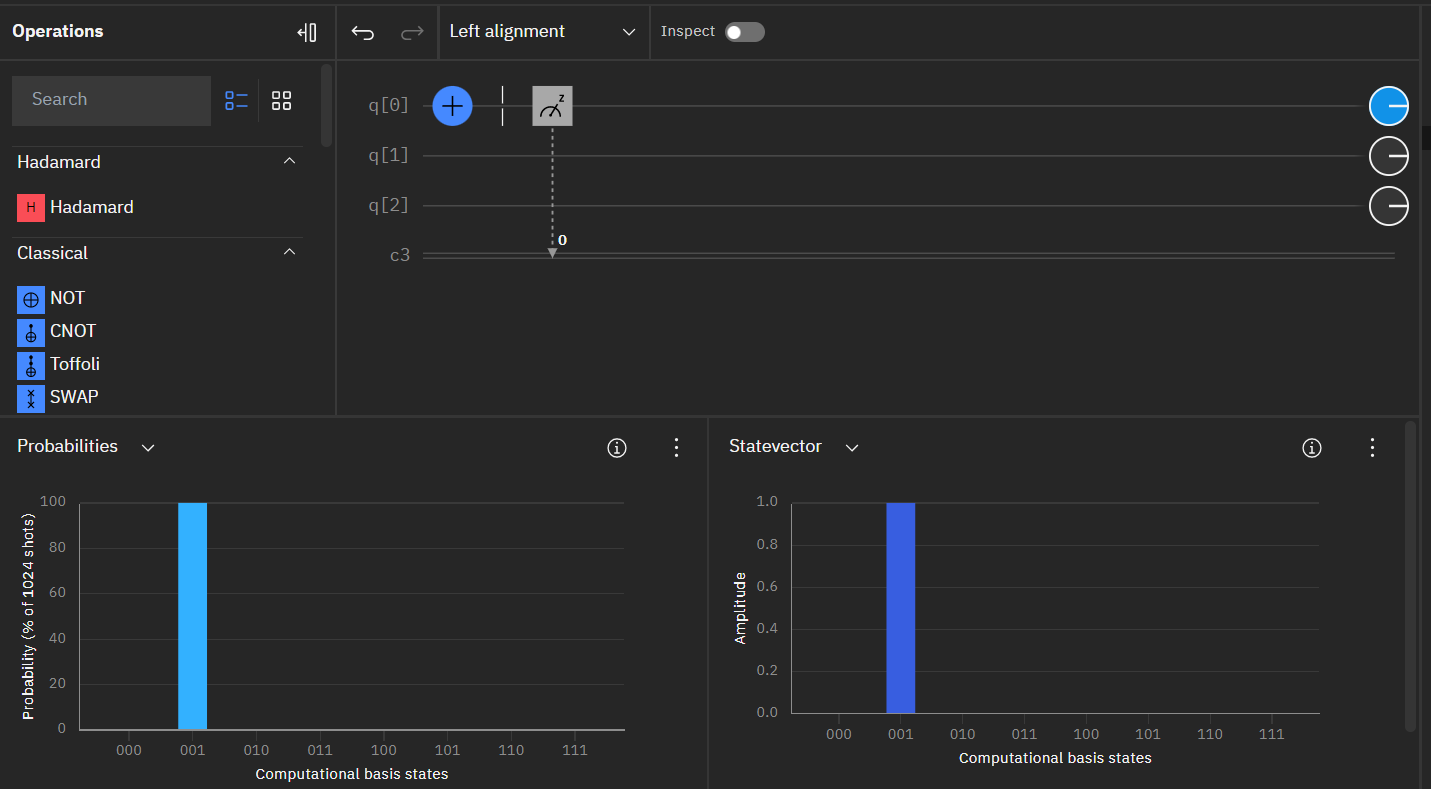

 # "AND" Gate

In [ ]:
def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output AND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    qc.initialize('0' + inp2 + inp1) #000
        
    qc.barrier()

    # this is where the program for quantum AND gate goes
    qc.ccx(0, 1, 2)#011 -> 111, 0
    
    

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [ ]:
for inp1 in ['0', '1']:
  for inp2 in ['0', '1']:
    qc, out = AND(inp1, inp2)
    print('AND with input1: ',inp1, ', input2: ', inp2,' gives output ',out)
    display(qc.draw())
    print('\n')

AND with input1:  0 , input2:  0  gives output  0


┌────────────────────┐ ░       ░    
q_0: ─|0>─┤0                   ├─░───■───░────
          │                    │ ░   │   ░    
q_1: ─|0>─┤1 Initialize(0,0,0) ├─░───■───░────
          │                    │ ░ ┌─┴─┐ ░ ┌─┐
q_2: ─────┤2                   ├─░─┤ X ├─░─┤M├
          └────────────────────┘ ░ └───┘ ░ └╥┘
c: 1/═══════════════════════════════════════╩═
                                            0



AND with input1:  0 , input2:  1  gives output  0


┌────────────────────┐ ░       ░    
q_0: ─|0>─┤0                   ├─░───■───░────
          │                    │ ░   │   ░    
q_1: ─|0>─┤1 Initialize(0,1,0) ├─░───■───░────
          │                    │ ░ ┌─┴─┐ ░ ┌─┐
q_2: ─────┤2                   ├─░─┤ X ├─░─┤M├
          └────────────────────┘ ░ └───┘ ░ └╥┘
c: 1/═══════════════════════════════════════╩═
                                            0



AND with input1:  1 , input2:  0  gives output  0


┌────────────────────┐ ░       ░    
q_0: ─|0>─┤0                   ├─░───■───░────
          │                    │ ░   │   ░    
q_1: ─|0>─┤1 Initialize(0,0,1) ├─░───■───░────
          │                    │ ░ ┌─┴─┐ ░ ┌─┐
q_2: ─────┤2                   ├─░─┤ X ├─░─┤M├
          └────────────────────┘ ░ └───┘ ░ └╥┘
c: 1/═══════════════════════════════════════╩═
                                            0



AND with input1:  1 , input2:  1  gives output  1


┌────────────────────┐ ░       ░    
q_0: ─|0>─┤0                   ├─░───■───░────
          │                    │ ░   │   ░    
q_1: ─|0>─┤1 Initialize(0,1,1) ├─░───■───░────
          │                    │ ░ ┌─┴─┐ ░ ┌─┐
q_2: ─────┤2                   ├─░─┤ X ├─░─┤M├
          └────────────────────┘ ░ └───┘ ░ └╥┘
c: 1/═══════════════════════════════════════╩═
                                            0

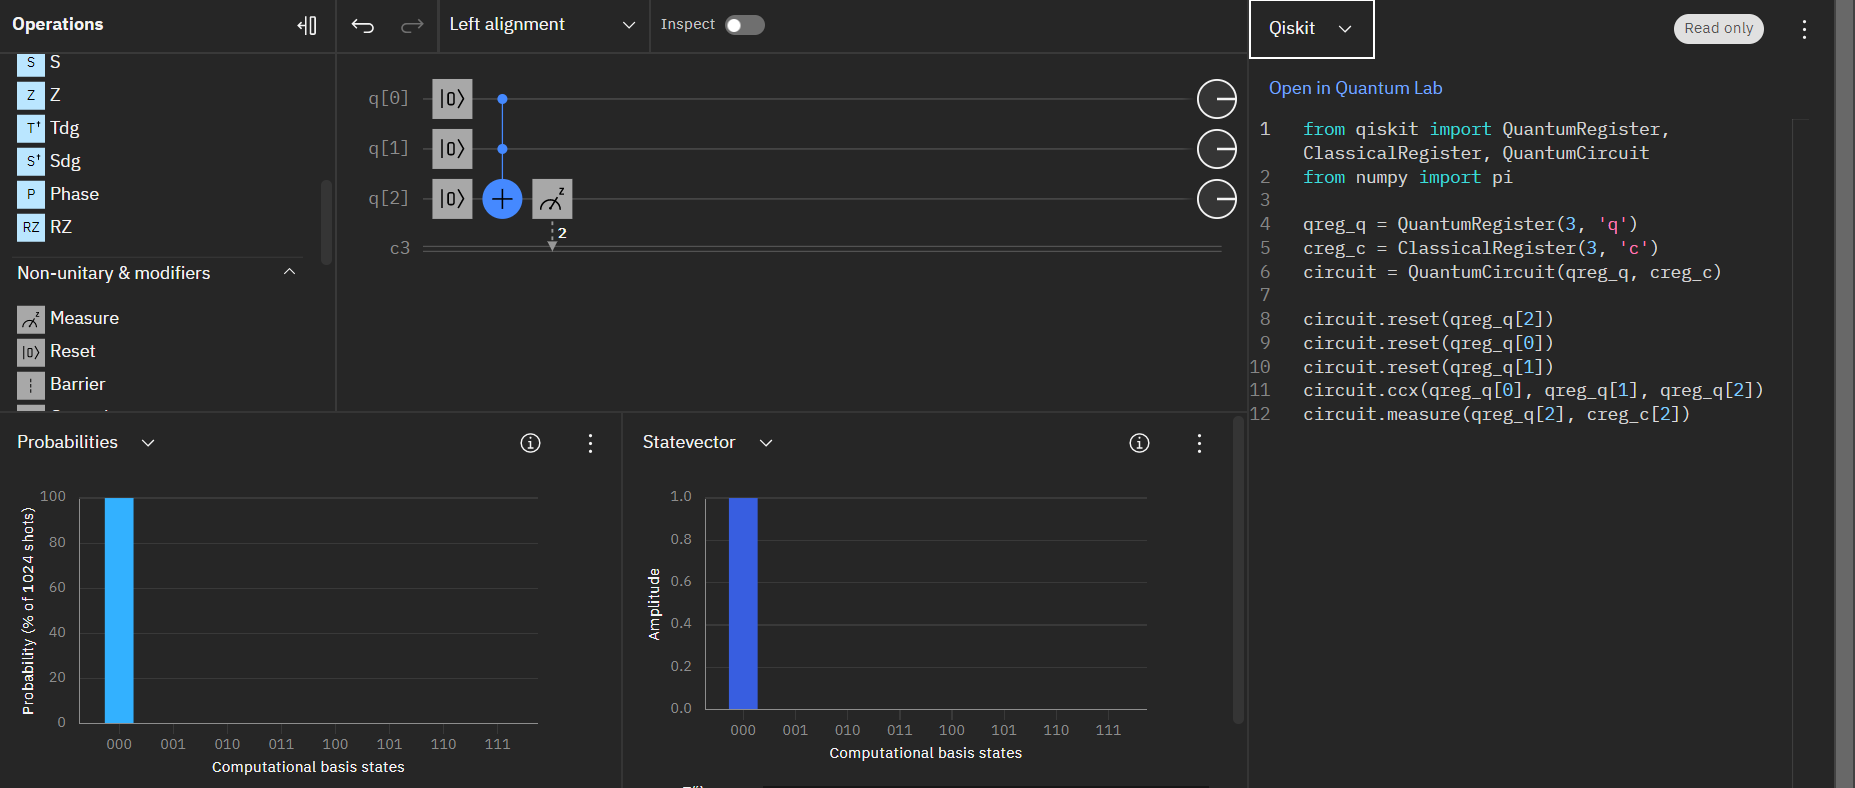

# "XOR" Gate

In [ ]:
def XOR(inp1,inp2):
    """An XOR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
    """
  
    qc = QuantumCircuit(2, 1) 
    qc.reset(range(2))
    qc.initialize(inp2 + inp1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # this is where the program for quantum XOR gate goes
    qc.cx(0, 1)#01-> 01, 00 -> 00, 10 -> 11, 11 -> 10
    # barrier between input state and gate operation 
    qc.barrier()
    
    qc.measure(1,0) # output from qubit 1 is measured
  
    #We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [ ]:
for inp1 in ['0', '1']:
  for inp2 in ['0', '1']:
    qc, out = XOR(inp1, inp2)
    print('XOR with input1: ',inp1, ', input2: ', inp2,' gives output ',out)
    display(qc.draw())
    print('\n')

XOR with input1:  0 , input2:  0  gives output  0


┌──────────────────┐ ░       ░    
q_0: ─|0>─┤0                 ├─░───■───░────
          │  Initialize(0,0) │ ░ ┌─┴─┐ ░ ┌─┐
q_1: ─|0>─┤1                 ├─░─┤ X ├─░─┤M├
          └──────────────────┘ ░ └───┘ ░ └╥┘
c: 1/═════════════════════════════════════╩═
                                          0



XOR with input1:  0 , input2:  1  gives output  1


┌──────────────────┐ ░       ░    
q_0: ─|0>─┤0                 ├─░───■───░────
          │  Initialize(1,0) │ ░ ┌─┴─┐ ░ ┌─┐
q_1: ─|0>─┤1                 ├─░─┤ X ├─░─┤M├
          └──────────────────┘ ░ └───┘ ░ └╥┘
c: 1/═════════════════════════════════════╩═
                                          0



XOR with input1:  1 , input2:  0  gives output  1


┌──────────────────┐ ░       ░    
q_0: ─|0>─┤0                 ├─░───■───░────
          │  Initialize(0,1) │ ░ ┌─┴─┐ ░ ┌─┐
q_1: ─|0>─┤1                 ├─░─┤ X ├─░─┤M├
          └──────────────────┘ ░ └───┘ ░ └╥┘
c: 1/═════════════════════════════════════╩═
                                          0



XOR with input1:  1 , input2:  1  gives output  0


┌──────────────────┐ ░       ░    
q_0: ─|0>─┤0                 ├─░───■───░────
          │  Initialize(1,1) │ ░ ┌─┴─┐ ░ ┌─┐
q_1: ─|0>─┤1                 ├─░─┤ X ├─░─┤M├
          └──────────────────┘ ░ └───┘ ░ └╥┘
c: 1/═════════════════════════════════════╩═
                                          0

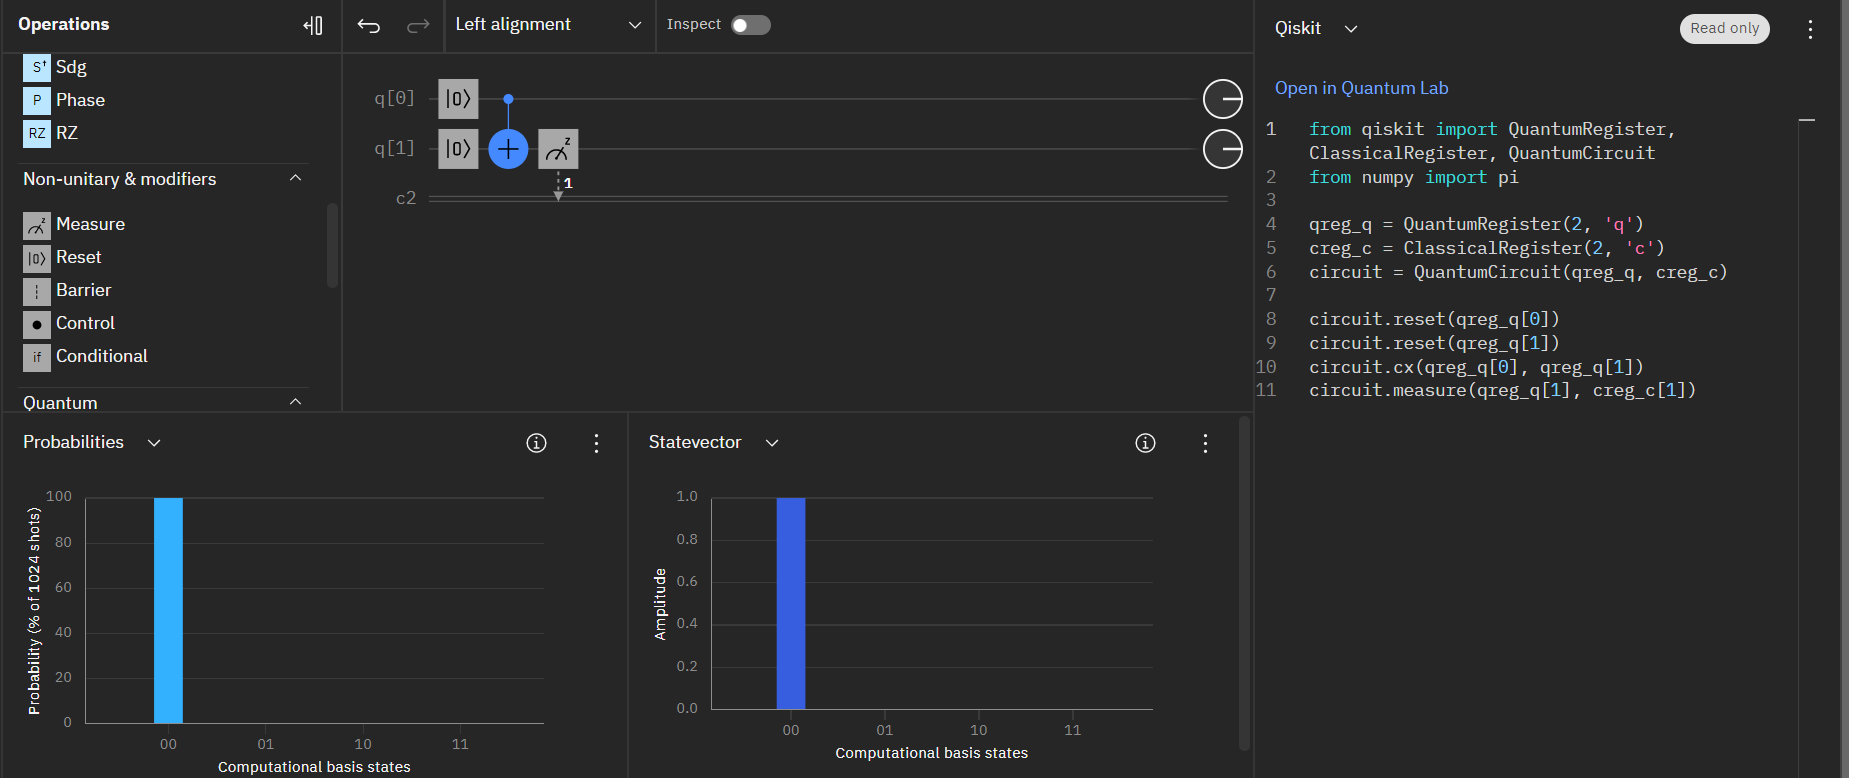

 # "OR" Gate

In [ ]:
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output OR circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
  
    qc.initialize('0' + inp2 + inp1) #000
        
    qc.barrier()

    # this is where the program for quantum OR gate goes
    qc.cx(0, 2) # |0>/|1>, |1> --> |1>
    qc.barrier()
    qc.cx(1, 2) # |1>, |0>/|1> --> |1>
    qc.barrier()

    qc.ccx(0, 1, 2) # |1>, |1> --> |1>
    qc.barrier()
    qc.cx(2, 0)

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [ ]:
for inp1 in ['0', '1']:
  for inp2 in ['0', '1']:
    qc, out = OR(inp1, inp2)
    print('OR with input1: ',inp1, ', input2: ', inp2,' gives output ',out)
    display(qc.draw())
    print('\n')

OR with input1:  0 , input2:  0  gives output  0


┌────────────────────┐ ░       ░       ░       ░ ┌───┐ ░    
q_0: ─|0>─┤0                   ├─░───■───░───────░───■───░─┤ X ├─░────
          │                    │ ░   │   ░       ░   │   ░ └─┬─┘ ░    
q_1: ─|0>─┤1 Initialize(0,0,0) ├─░───┼───░───■───░───■───░───┼───░────
          │                    │ ░ ┌─┴─┐ ░ ┌─┴─┐ ░ ┌─┴─┐ ░   │   ░ ┌─┐
q_2: ─|0>─┤2                   ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░───■───░─┤M├
          └────────────────────┘ ░ └───┘ ░ └───┘ ░ └───┘ ░       ░ └╥┘
c: 1/═══════════════════════════════════════════════════════════════╩═
                                                                    0



OR with input1:  0 , input2:  1  gives output  1


┌────────────────────┐ ░       ░       ░       ░ ┌───┐ ░    
q_0: ─|0>─┤0                   ├─░───■───░───────░───■───░─┤ X ├─░────
          │                    │ ░   │   ░       ░   │   ░ └─┬─┘ ░    
q_1: ─|0>─┤1 Initialize(0,1,0) ├─░───┼───░───■───░───■───░───┼───░────
          │                    │ ░ ┌─┴─┐ ░ ┌─┴─┐ ░ ┌─┴─┐ ░   │   ░ ┌─┐
q_2: ─|0>─┤2                   ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░───■───░─┤M├
          └────────────────────┘ ░ └───┘ ░ └───┘ ░ └───┘ ░       ░ └╥┘
c: 1/═══════════════════════════════════════════════════════════════╩═
                                                                    0



OR with input1:  1 , input2:  0  gives output  1


┌────────────────────┐ ░       ░       ░       ░ ┌───┐ ░    
q_0: ─|0>─┤0                   ├─░───■───░───────░───■───░─┤ X ├─░────
          │                    │ ░   │   ░       ░   │   ░ └─┬─┘ ░    
q_1: ─|0>─┤1 Initialize(0,0,1) ├─░───┼───░───■───░───■───░───┼───░────
          │                    │ ░ ┌─┴─┐ ░ ┌─┴─┐ ░ ┌─┴─┐ ░   │   ░ ┌─┐
q_2: ─|0>─┤2                   ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░───■───░─┤M├
          └────────────────────┘ ░ └───┘ ░ └───┘ ░ └───┘ ░       ░ └╥┘
c: 1/═══════════════════════════════════════════════════════════════╩═
                                                                    0



OR with input1:  1 , input2:  1  gives output  1


┌────────────────────┐ ░       ░       ░       ░ ┌───┐ ░    
q_0: ─|0>─┤0                   ├─░───■───░───────░───■───░─┤ X ├─░────
          │                    │ ░   │   ░       ░   │   ░ └─┬─┘ ░    
q_1: ─|0>─┤1 Initialize(0,1,1) ├─░───┼───░───■───░───■───░───┼───░────
          │                    │ ░ ┌─┴─┐ ░ ┌─┴─┐ ░ ┌─┴─┐ ░   │   ░ ┌─┐
q_2: ─|0>─┤2                   ├─░─┤ X ├─░─┤ X ├─░─┤ X ├─░───■───░─┤M├
          └────────────────────┘ ░ └───┘ ░ └───┘ ░ └───┘ ░       ░ └╥┘
c: 1/═══════════════════════════════════════════════════════════════╩═
                                                                    0

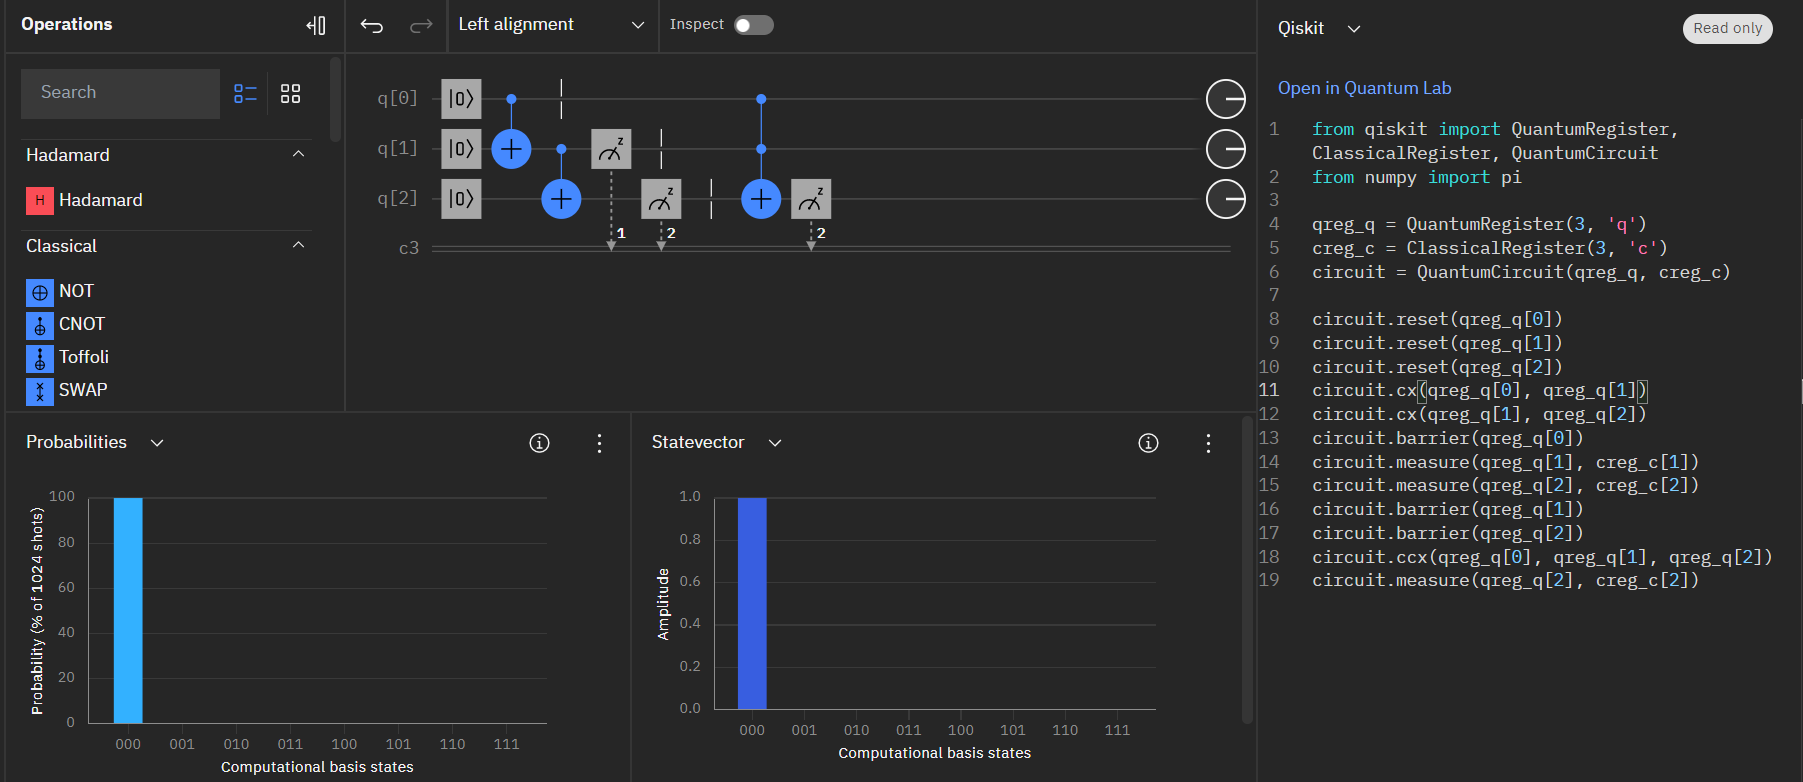

# **The Full Adder Circuit**

In [ ]:
def FullAdder(A, B, Cin):
  S = XOR(XOR(A,B)[1],Cin)[1]
  AND1 = AND(A,B)[1]
  AND2 = AND(A,Cin)[1]
  AND3 = AND(B,Cin)[1]
  Cout = OR(OR(AND1, AND2)[1], AND3)[1]

  print("S = " + S, "Cout = " + Cout)

In [ ]:
FullAdder('1', '1', '0')

S = 0 Cout = 1
